In [21]:
from sklearn.datasets import fetch_openml
import numpy as np

In [5]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐
ing:

- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per
feature
- A target key containing an array with the labels

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using
Matplotlib’s imshow() function:

In [17]:
X = X.to_numpy()

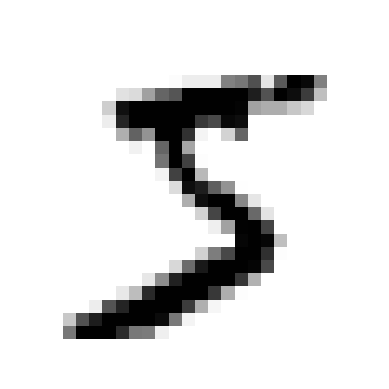

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

This looks like a 5, and indeed that’s what the label tells us:

In [19]:
y[0]

'5'

Now, let's cast the string label to number

In [22]:
y = y.astype(np.uint8)

### Split Data

In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
from sklearn.linear_model import LogisticRegression # still classificication
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=1000)
models = [knn,lr]

preds = [[],[]]

for i,model in enumerate(models):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds

/Users/hanisami/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)]

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

array([0.969  , 0.96805, 0.9675 ])

In [27]:
cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy")

/Users/hanisami/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hanisami/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.9017 , 0.90425, 0.90765])

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred_knn = cross_val_predict(knn, X_train, y_train, cv=3)
y_train_pred_lr = cross_val_predict(lr, X_train, y_train, cv=3)

/Users/hanisami/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hanisami/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred_knn)

array([[5884,    3,    3,    0,    1,    4,   18,    1,    5,    4],
       [   3, 6708,    8,    1,    2,    1,    2,   10,    3,    4],
       [  53,   56, 5706,   13,    9,    3,    8,   87,   16,    7],
       [  11,   16,   38, 5898,    1,   68,    3,   34,   39,   23],
       [   8,   59,    1,    0, 5634,    0,   12,    9,    3,  116],
       [  24,   13,    7,   80,    8, 5195,   58,    5,   10,   21],
       [  27,   13,    1,    0,    6,   18, 5850,    0,    3,    0],
       [   5,   60,   14,    3,   22,    2,    0, 6091,    2,   66],
       [  29,   76,   19,   83,   39,   97,   26,   14, 5416,   52],
       [  18,   15,    7,   39,   57,   12,    3,   80,    9, 5709]])

In [30]:
confusion_matrix(y_train, y_train_pred_lr)

array([[5625,    2,   47,   15,   15,   72,   66,   15,   50,   16],
       [   2, 6497,   45,   34,   11,   24,    9,   10,   97,   13],
       [  65,   97, 5206,  128,   74,   30,   95,   89,  146,   28],
       [  28,   30,  171, 5383,   12,  212,   25,   64,  133,   73],
       [  19,   26,   51,   14, 5335,   25,   70,   40,   47,  215],
       [  91,   21,   56,  205,   74, 4568,  127,   22,  181,   76],
       [  50,   15,   79,    5,   68,   92, 5564,    3,   41,    1],
       [  24,   26,   64,   47,   77,   11,    6, 5738,   36,  236],
       [  53,  130,   95,  152,   33,  186,   50,   32, 5034,   86],
       [  20,   18,   25,   80,  173,   41,    4,  207,   59, 5322]])

In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_knn, average='weighted')

0.9683778874480654

In [32]:
precision_score(y_train, y_train_pred_lr, average='weighted')

0.9042877868708334

In [33]:
recall_score(y_train, y_train_pred_knn, average='weighted')

0.9681833333333333

In [34]:
recall_score(y_train, y_train_pred_lr, average='weighted')

0.9045333333333333

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred_knn, average='weighted')

0.9681102373105115

In [36]:
f1_score(y_train, y_train_pred_lr, average='weighted')

0.9043544108981671